In [9]:
from IPython.display import HTML

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline



In [28]:
# load in data

# Read in the drinks data.
drinks = pd.read_csv('./data/drinks.csv')
drinks['continent'].fillna('NA', inplace=True) # because when reading the file pandas misinterprets "NA" as a null value, not "North America"

# Read in the ufo data.
ufo = pd.read_csv('./data/ufo.csv')
ufo['Time'] = pd.to_datetime(ufo.Time) # don't dwell on these two lines - we'll look at datetimes in detail in DS4
ufo['Year'] = ufo.Time.dt.year

In [12]:
# look at the ufo dataset to understand what it's about
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933


In [14]:
# Count the number of ufo reports each year (and sort by year).
ufo.Year.value_counts().sort_index()

1930       2
1931       2
1933       1
1934       1
1935       1
        ... 
2010    4154
2011    5089
2012    7263
2013    7003
2014    5382
Name: Year, Length: 82, dtype: int64

<AxesSubplot:>

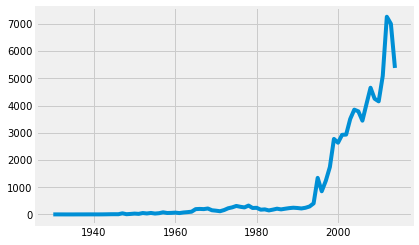

In [15]:
# Compare with line plot -- UFO sightings by year. (Ordering by year makes sense.)
ufo.Year.value_counts().sort_index().plot(kind='line')


In [16]:
ufo['State']

0        NY
1        NJ
2        CO
3        KS
4        NY
         ..
80538    NE
80539    OH
80540    AZ
80541    IL
80542    FL
Name: State, Length: 80543, dtype: object

<AxesSubplot:>

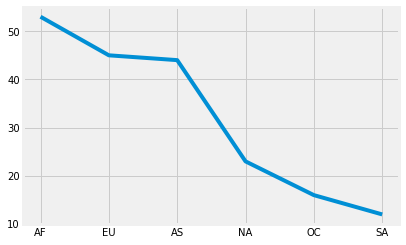

In [17]:
# COMMON MISTAKE: Don't use a line plot when the x-axis cannot be ordered sensically!

# For example, ordering by continent below shows a trend where no exists ... 
#    it would be just as valid to plot the continents in any order.

# So, a line plot is the wrong type of plot for this data.
# Always think about what you're plotting and if it makes sense.

drinks.continent.value_counts().plot()

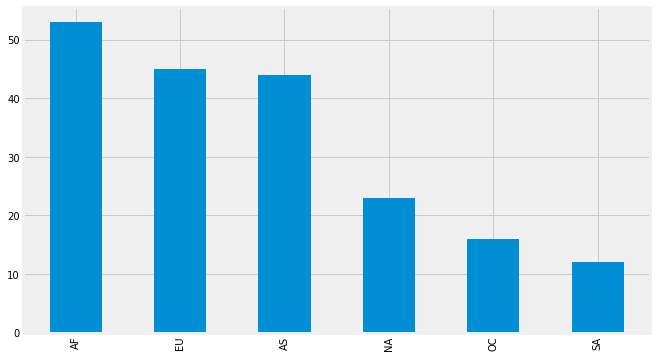

In [23]:
# Plot the same data as a bar plot -- a much better choice! We can also change the size
drinks.continent.value_counts().plot(kind='bar', figsize=(10,6)); # 

In [24]:
# Calculate the mean alcohol amounts for each continent.
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


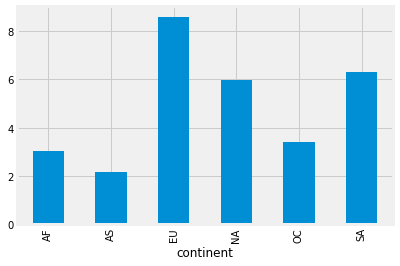

In [22]:
# plot for a single variable
drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean().plot(kind='bar');

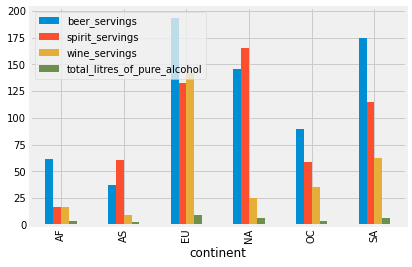

In [21]:
# Side-by-side bar plots - if we don't specify a column, pandas will plot bars (or lines) of all columns on the same axes
drinks.groupby('continent').mean().plot(kind='bar');

<AxesSubplot:ylabel='Frequency'>

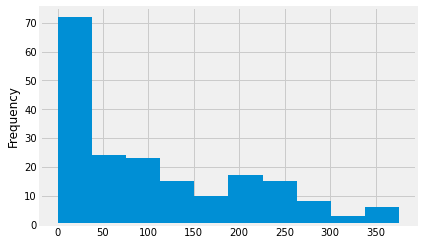

In [20]:
# histogram to show the distribution of values
# we divide the values of the column into "bins", then the column values go on the x-axis and over each bin is a bar whose height is the number of records in that bin
drinks['beer_servings'].plot(kind='hist')

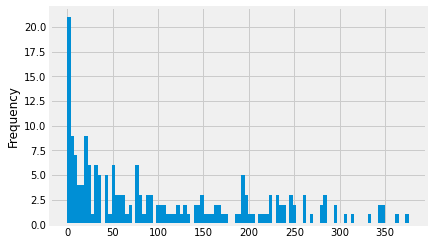

In [32]:
# Try more bins — it takes the range of the data and divides it into 20 evenly spaced bins.
drinks['beer_servings'].plot(kind='hist', bins=100);

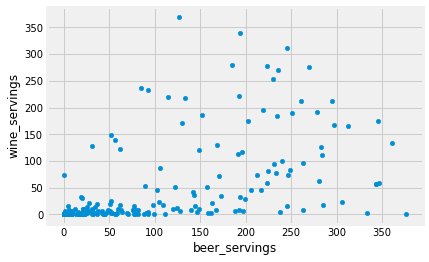

In [18]:
# Compare two variables with a scatter plot.
drinks.plot(kind='scatter', x='beer_servings', y='wine_servings');

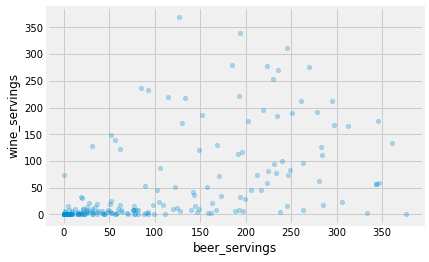

In [25]:
# Add transparency (can be useful in scatter plots with lots of tightly clustered points)
drinks.plot(kind='scatter', x='beer_servings', y='wine_servings', alpha=0.3);

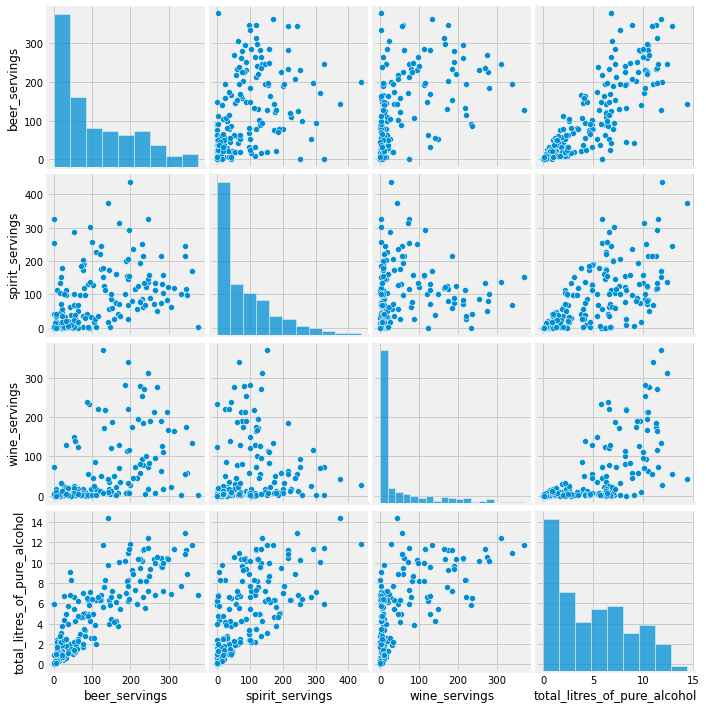

In [26]:
# VERY brief intro to another library for more advanced plotting
import seaborn as sns
sns.pairplot(drinks)

<AxesSubplot:>

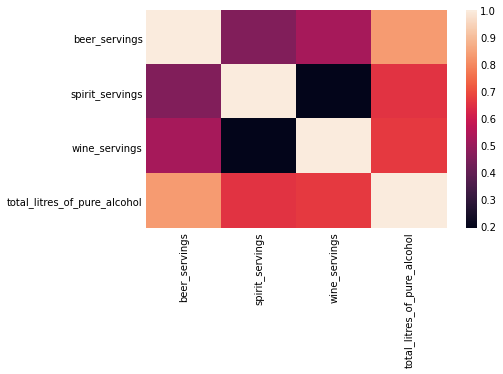

In [27]:
drinks_correlations = drinks.corr()
sns.heatmap(drinks_correlations)